# Figure 6.

Distribution of clouds and precipitation for the Trappist-1e and Proxima b cases in the control and sensitivity simulations. Low (L), mid-level (M), and high (H) cloud classes correspond to $0-2~km$, $2-5.5~km$, and $>5.5~km$ in altitude, respectively. The cloud cover is given by the maximum cloud fraction (0-1) on any model level. If only one type of cloud is present, the color scale shows that fraction, with a contour interval of $0.1$. If more than one type of cloud is present, the color scale shows the average of the two or three cloud types present. Note clouds with very low water content (optical depth $<0.01$) are filtered out. Mean precipitation ($mm~h^{-1}$) in the form of rain and snow is shown by green and blue contours, respectively.

[Skip code and jump to the figure](#Show-the-figure)

----------------------------------

Import the necessary libraries.

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import iris
from iris.analysis.cartography import get_xy_grids

import matplotlib.pyplot as plt
import matplotlib.patheffects as PE

import numpy as np

In [3]:
from aeolus.calc import last_year_mean, precip_sum
from aeolus.core import Run
from aeolus.plot.cloud import CloudPlotter
from aeolus.subset import DIM_CONSTR_TYX

In [4]:
from commons import (
    GLM_MODEL_TIMESTEP,
    PLANET_ALIASES,
    RUN_ALIASES,
    OUTPUT_NAME_PREFIX,
)
import mypaths
from plot_func import (
    CART_KW,
    MARKER_KW,
    add_aux_yticks,
    add_custom_legend,
    draw_scalar_cube,
    make_map_figure,
    use_style,
)

Global stylesheet for figures.

In [5]:
use_style()

## Load data

Create a dictionary of `Run` objects with preprocessed data.

In [6]:
runs = {}
for planet in PLANET_ALIASES.keys():
    for run_key in RUN_ALIASES.keys():
        label = f"{planet}_{run_key}"

        fname = mypaths.sadir / label / "_processed" / f"{label}.nc"

        runs[label] = Run(
            files=fname,
            name=label,
            planet=planet,
            timestep=GLM_MODEL_TIMESTEP,
            processed=True,
        )

## Plot the results

Plot settings

In [7]:
# Axes grid specs
AXGR_KW = dict(
    axes_pad=(0.5, 0.4),
    cbar_location="right",
    cbar_mode="single",
    cbar_pad=0.3,
    cbar_size="1.5%",
    label_mode="",
)

Formatting of precipitation contours

In [8]:
def _fmt_clabels(x):
    """Format contour labels."""
    if np.allclose(int(x), x):
        fmt = "{x:.0f}"
    else:
        fmt = "{x:.1f}"
    return fmt.format(x=x)


_precip_levels = [0.1, 0.5, 1, 5, 10, 20, 50, 100]
path_effects = [PE.withStroke(linewidth=1, foreground="#222222")]

In [9]:
fig, axgr = make_map_figure(2, 3, **AXGR_KW)
cax = axgr.cbar_axes[0]
for planet, ax_col in zip(PLANET_ALIASES, axgr.axes_column):
    for run_key, ax in zip(RUN_ALIASES.keys(), ax_col):
        label = f"{planet}_{run_key}"
        ax.set_title(RUN_ALIASES[run_key], fontsize="medium", pad=5, loc="right")
        if run_key == "grcs":
            ax.set_title(PLANET_ALIASES[planet], fontsize="large", pad=5, loc="center")

        lons, lats = get_xy_grids(runs[label].proc.extract(DIM_CONSTR_TYX)[0])
        c_p = CloudPlotter(
            iris.cube.CubeList([last_year_mean(i) for i in runs[label].proc])
        )
        c_p.scale_data()
        c_p.pcolormesh(
            ax, xy=(lons, lats), cb_kwargs=dict(cax=cax), rasterized=True, **CART_KW
        )

        for _name, _color in zip(["snow", "rain"], ["C0", "C2"]):
            precip = last_year_mean(precip_sum(runs[label].proc, _name))
            h = draw_scalar_cube(
                precip,
                ax,
                method="contour",
                colors=_color,
                levels=_precip_levels,
                linewidths=1,
            )
            clbls = ax.clabel(h, fmt=_fmt_clabels, fontsize="x-small")
            plt.setp(h.collections, path_effects=path_effects)
            plt.setp(clbls, path_effects=path_effects)

plt.close()  # Show the figure in a separate cell

## Show the figure

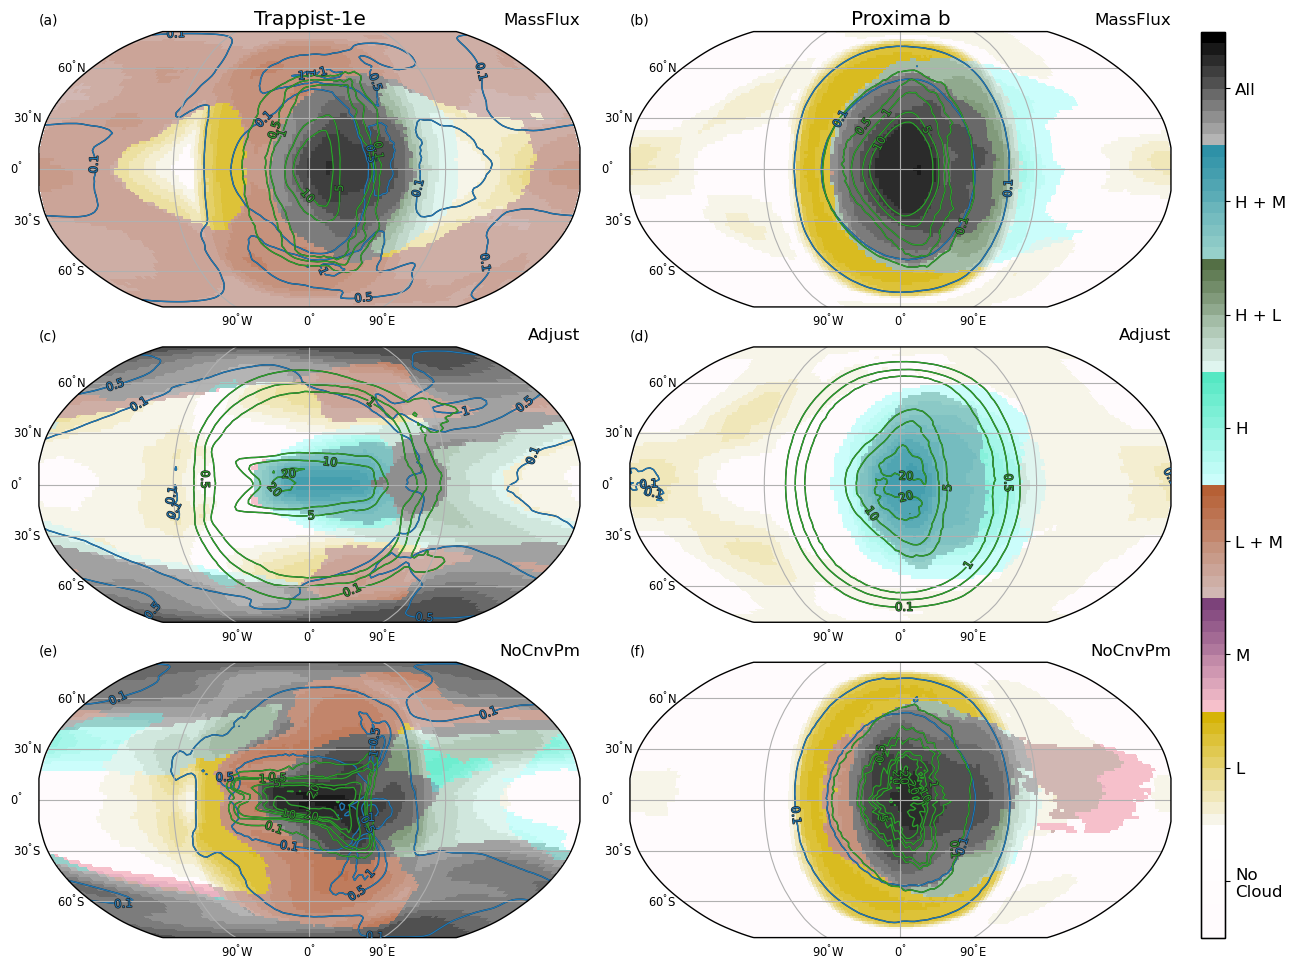

In [10]:
fig

And save it.

In [11]:
imgname = (
    mypaths.plotdir / f"{OUTPUT_NAME_PREFIX}__cloud_types__w_precip.png"
)

In [12]:
fig.savefig(imgname, dpi=200)
print(f"Saved to ../{imgname.relative_to(mypaths.topdir)}")

Saved to ../plots/trap1e_proxb__grcs_llcs_all_rain_acoff__cloud_types__w_precip.png
